In [1]:
#import pybedtools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
#import seaborn.objects as so

from scipy.stats import pearsonr, spearmanr
import glob

# Read Data

In [2]:
def flatten_tissues_expand_df(tfbs_df):
    tfbs_part_repeat = tfbs_df.iloc[:,:9]
    tfbs_part_flatten = tfbs_df.iloc[:,9:]
    
    repeat_df =  pd.DataFrame(np.repeat(tfbs_part_repeat.values, tfbs_part_flatten.shape[1], axis=0))
    flatten_arr = tfbs_part_flatten.to_numpy().flatten()

    tissue_repeat = np.tile(np.array(tfbs_part_flatten.columns), len(tfbs_part_repeat))
    
    repeat_df.columns = tfbs_part_repeat.columns
    repeat_df["GeneExpr"] = flatten_arr
    repeat_df["Tissue"] = tissue_repeat
    

    return repeat_df

In [147]:
path_old = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS.csv"
# #path = r"C:\Users\julia\MyPython\BA\All_TFBS.csv"
df_combined_old = pd.read_csv(path_old)
# df_combined = df_combined[df_combined["chr"] != "chrM"]
# df = df_combined.replace("chrf28811", "MEIS1")
df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS_new.csv", index=False)

In [123]:
path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS_new.csv"
# path = r"C:\Users\julia\MyPython\BA\All_TFBS_new.csv"
df_combined = pd.read_csv(path)

In [20]:
df_combined

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,...,1.121,0.967,1.650,2.041,1.969,2.102,1.274,2.616,4285.500,0.483
1,chr1,ENSG00000143569.18,HMBOX1,9,19,T,1,12,11,50.840,...,49.715,53.410,35.470,39.380,26.340,65.410,60.040,65.595,55.225,17.250
2,chr10,ENSG00000213390.10,HMBOX1,47,57,nT,1,73,55,7.477,...,9.733,9.144,8.263,20.150,4.508,32.780,6.792,10.970,8.785,7.745
3,chr1,ENSG00000169241.17,HMBOX1,160,170,nT,1,115,81,31.560,...,41.695,40.380,46.890,52.560,33.060,22.880,46.590,30.335,32.340,18.380
4,chr1,ENSG00000185499.16,HMBOX1,173,183,nT,1,23,20,5.235,...,6.015,6.711,9.300,3.004,362.500,36.160,28.620,21.455,22.830,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700844,chr7,ENSG00000105851.10,STAT5B,-3,8,T,1,33,32,1.200,...,0.251,0.280,2.243,5.790,0.574,4.966,0.878,0.607,0.433,7.502
700845,chr7,ENSG00000075790.10,STAT5B,124,135,nT,1,31,26,20.870,...,12.365,11.990,8.953,9.601,8.210,30.260,37.430,29.180,21.870,2.035
700846,chr7,ENSG00000128590.4,STAT5B,54,69,T,1,71,59,25.350,...,19.705,16.970,20.790,25.160,24.560,53.610,42.800,36.135,23.670,8.608
700847,chr7,ENSG00000198839.9,STAT5B,56,71,nT,1,122,89,10.450,...,10.200,9.264,6.335,6.266,7.490,7.119,9.892,10.200,10.480,3.083


In [12]:
flat_df = flatten_tissues_expand_df(df_combined)

Variance between Tissues

In [93]:
# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)

# Target Gene Expression

## Relationship between TSS-TFBS distance, Geneexpression and strand orientation 

Chr22, JUN

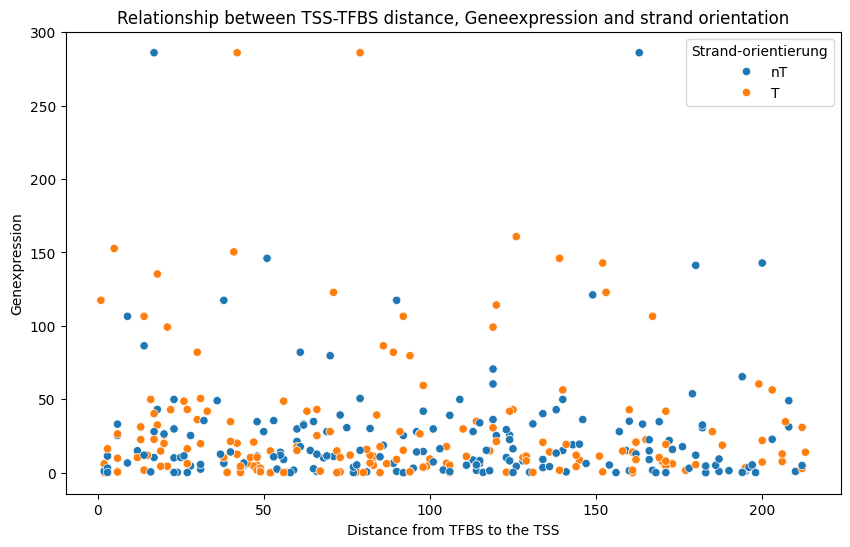

In [36]:
#ChatGPT, Plot der die Beziehung zwischen der Entfernung der TFBS zum TSS und dem Genexpressionswert für verschiedene Strandorientierungen darstellt:
df = df_combined[(df_combined["chr"]=="chr22") & (df_combined["tf"]=="ESR1")]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_tss', y='Stomach', hue='strand_orientation')
plt.xlabel('Distance from TFBS to the TSS')
plt.ylabel('Genexpression')
plt.title('Relationship between TSS-TFBS distance, Geneexpression and strand orientation')
plt.legend(title='Strand-orientierung')
plt.show()

## Number of Target genes per TF

In [11]:
tf_id_count = flat_df.groupby(["tf"])["geneID"].nunique()

In [276]:
# tf_id_count.to_csv("images/CSV_tf_id_count.csv")

In [ ]:
# norm_bar = plt.Normalize(min(tf_id_count.values), max(tf_id_count.values))
# cmap_bar = plt.get_cmap("magma")

fig, ax = plt.subplots(figsize=(10, 42))
sns.barplot(x=tf_id_count.values, y=tf_id_count.index)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Number of Target Genes')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

#fig.savefig("number_of_target_genes.png")

## Mean Target Gene Expression -Flat

First we reduce the Dataset for all homotypic copies of a tfbs per promotor. So that we have for each TF a promotor only once. 

In [13]:
def reduce_homotypic_tfbs_occurence(df):
    occur_region = df.groupby(["chr", "geneID", "tf"]).cumcount()
    df_red = df[occur_region == 0]
    return df_red

In [14]:
df_reduced_homotypic = reduce_homotypic_tfbs_occurence(df_combined)
df_reduced_homotypic_flat = flatten_tissues_expand_df(df_reduced_homotypic)
df_reduced_homotypic_flat

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,GeneExpr,Tissue
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,Adipose - Subcutaneous
1,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.043,Adipose - Visceral (Omentum)
2,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.906,Adrenal Gland
3,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.397,Artery - Aorta
4,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.385,Artery - Coronary
...,...,...,...,...,...,...,...,...,...,...,...
28151113,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,2.226,Testis
28151114,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,7.504,Thyroid
28151115,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,11.100,Uterus
28151116,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,6.597,Vagina


<span style='background:blue'>
Next we remove all GeneExpr with the value 0 and take the $log_{2}()$ in order to transform the date in a biologigly more usefull scale.
</span>


In [15]:
def remove_zero_and_transform_log2(df_flat, x="GeneExpr"):
    # remove GenExpression values of zero
    df_no_zero = df_flat.copy()[df_flat[x] != 0]
    # transform log2
    df_no_zero["log2_GeneExpr"] = np.log2(df_no_zero[x])
    return df_no_zero
df_log2_GeneExpr = remove_zero_and_transform_log2(df_reduced_homotypic_flat)

In [23]:
def plus_one_and_transform_log2(df_flat, x="GeneExpr"):
    # Add to each Gene Expression values a +1. This prevent values of 0 and makes the data more interpretable.
    df_new_expr = df_flat[x].to_numpy() + 1
    # transform log2
    df_new = df_flat.copy()
    df_new["log2_GeneExpr"] = np.log2(df_new_expr)
    return df_new

In [24]:
# Attention, overrite other variable
# df_log2_GeneExpr = plus_one_and_transform_log2(df_reduced_homotypic_flat)

In [19]:
df_log2_GeneExpr

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,GeneExpr,Tissue,log2_GeneExpr
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,Adipose - Subcutaneous,-0.533242
1,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.043,Adipose - Visceral (Omentum),0.060739
2,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.906,Adrenal Gland,0.930548
3,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.397,Artery - Aorta,0.482332
4,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.385,Artery - Coronary,0.469886
...,...,...,...,...,...,...,...,...,...,...,...,...
28151113,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,2.226,Testis,1.154454
28151114,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,7.504,Thyroid,2.907660
28151115,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,11.100,Uterus,3.472488
28151116,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,6.597,Vagina,2.721810


<span style='background:blue'>
Next we calculate the mean GeneExpr for each TF
</span>

In [21]:
def get_mean_expression_per_tf(df_flat, x="log2_GeneExpr"):
    return df_flat.groupby(["tf"])[x].mean()

<span style='background:blue'>
Now we sort the tfs
</span>

In [22]:
# Sort DataFrame
df_log2_GeneExpr_sort = df_log2_GeneExpr.sort_values(by="tf")

In [23]:
df_log2_GeneExpr_sort_mean = get_mean_expression_per_tf(df_log2_GeneExpr_sort)
df_log2_GeneExpr_sort_mean.sort_values().index
# tf_id_count.reindex(df_log2_GeneExpr_sort_mean.sort_values().index)

Index(['ISL1', 'HNF1A', 'HNF1B', 'SOX10', 'NR1H4', 'LHX2', 'DUX4', 'BATF3',
       'GATA6', 'SIX1',
       ...
       'HSF1', 'YY2', 'NR2C2', 'ELK1', 'CLOCK', 'NR2C1', 'HSF2', 'TFEB',
       'XBP1', 'NR5A1'],
      dtype='object', name='tf', length=267)

<span style='background:blue'>
To see if the number of Target-Genes correlate with the mean Target-Gene Expression
</span>

<Axes: xlabel='log2_GeneExpr', ylabel='Count'>

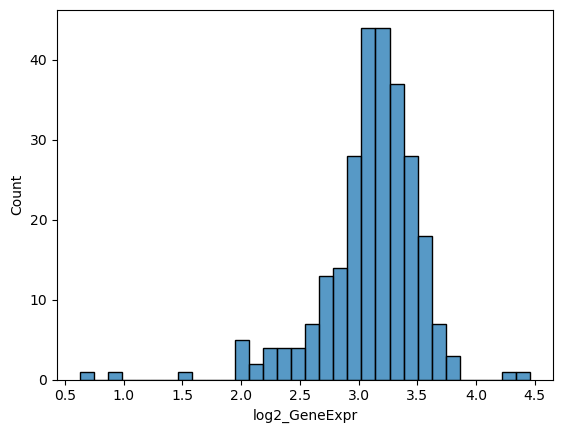

In [82]:
# sns.histplot(np.log2((tf_id_count)))
sns.histplot(df_log2_GeneExpr_sort_mean)

In [92]:
pearsonr(np.log2(tf_id_count), df_log2_GeneExpr_sort_mean)

PearsonRResult(statistic=0.23408287319999724, pvalue=0.00011302777674126536)

<span style='background:blue'>
Colormap to show the mean values of the GeneExpression
</span>

In [27]:
norm = plt.Normalize(df_log2_GeneExpr_sort_mean.min(), df_log2_GeneExpr_sort_mean.max())
sm = mpl.cm.ScalarMappable(cmap="viridis", norm=norm)
my_cmap = mpl.colormaps["viridis"]

color_i = {df_log2_GeneExpr_sort_mean.index[i]:my_cmap(norm(df_log2_GeneExpr_sort_mean[i])) for i in range(len(df_log2_GeneExpr_sort_mean))}

In [28]:
df_log2_GeneExpr_sort

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,GeneExpr,Tissue,log2_GeneExpr
1120452,chr19,ENSG00000073008.14,AR,84,101,T,1,37,37,16.870,Bladder,4.076388
1177754,chr4,ENSG00000172493.20,AR,133,150,nT,2,70,51,5.012,Brain - Hippocampus,2.325386
1177753,chr4,ENSG00000172493.20,AR,133,150,nT,2,70,51,5.799,Brain - Frontal Cortex (BA9),2.535804
1177752,chr4,ENSG00000172493.20,AR,133,150,nT,2,70,51,5.923,Brain - Cortex,2.566328
1177751,chr4,ENSG00000172493.20,AR,133,150,nT,2,70,51,6.688,Brain - Cerebellum,2.741575
...,...,...,...,...,...,...,...,...,...,...,...,...
2839662,chr2,ENSG00000119865.8,chrf28811,175,182,T,1,37,29,24.200,Brain - Spinal cord (cervical c-1),4.596935
2839663,chr2,ENSG00000119865.8,chrf28811,175,182,T,1,37,29,23.640,Brain - Substantia nigra,4.563158
2839664,chr2,ENSG00000119865.8,chrf28811,175,182,T,1,37,29,25.320,Breast - Mammary Tissue,4.662205
2839694,chr2,ENSG00000119865.8,chrf28811,175,182,T,1,37,29,13.530,Thyroid,3.758090


<span style='background:blue'>
Plot
</span>

In [271]:
# y1_order = df_log2_GeneExpr_sort_mean.index
# y2_order = tf_id_count

# Sort boxplot by mean GeneExpr
y1_order = df_log2_GeneExpr_sort_mean.sort_values(ascending=False).index
y2_order = tf_id_count.reindex(y1_order)
# sns.barplot(x=y2_order.index, y=y2_order.values, )
# sns.barplot(y2_order)
print(df_mean_expr_count[df_mean_expr_count["# Target Genes"] > 6000].sort_values(by="# Target Genes", ascending=False).to_latex())
print(df_mean_expr_count[df_mean_expr_count["# Target Genes"] > 6000].sort_values(by="# Target Genes", ascending=False).index)

\begin{tabular}{lrr}
\toprule
{} &  log2(GeneExpr) &  \# Target Genes \\
tf     &                 &                 \\
\midrule
MYC    &        2.972291 &            9354 \\
ESR1   &        2.985546 &            9135 \\
SP1    &        2.973154 &            8753 \\
CTCF   &        2.903889 &            8682 \\
E2F1   &        3.134320 &            8174 \\
MAX    &        2.949814 &            7746 \\
RUNX1  &        3.165594 &            7745 \\
TFAP2C &        2.941367 &            7377 \\
AR     &        3.090303 &            6973 \\
KLF5   &        3.280019 &            6936 \\
JUN    &        3.096722 &            6481 \\
RELA   &        3.214892 &            6307 \\
MYCN   &        3.022536 &            6303 \\
CREB1  &        3.116243 &            6266 \\
E2F6   &        3.160893 &            6214 \\
SP2    &        3.267225 &            6119 \\
\bottomrule
\end{tabular}

Index(['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR',
       'KLF5', 'JUN', 'RELA', 'M

C:\Users\julia\AppData\Local\Temp\ipykernel_7988\3996907872.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_mean_expr_count[df_mean_expr_count["# Target Genes"] > 6000].sort_values(by="# Target Genes", ascending=False).to_latex())


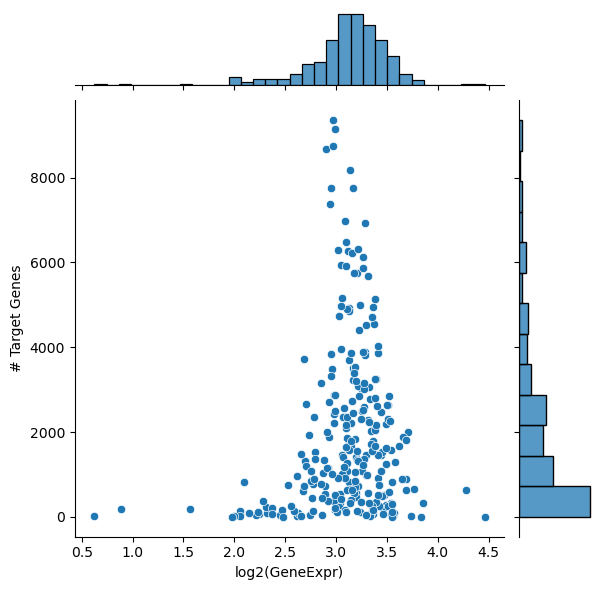

In [99]:
df_mean_expr_count = df_log2_GeneExpr_sort_mean.to_frame(name="log2(GeneExpr)").join(tf_id_count.to_frame(name="# Target Genes"))
df_mean_expr_count
sns.jointplot(df_mean_expr_count, x="log2(GeneExpr)", y="# Target Genes")
# plt.savefig("jointplot_meanGeneExpr_countTargetGene.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 47)) 
sns.boxplot(df_log2_GeneExpr_sort, x="log2_GeneExpr", y="tf",whis=(0, 100), palette=color_i, order=y1_order)

ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('log2(GeneExpr)')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

# plt.subplots_adjust(top=1.2)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top" , pad=0.025)
cbar.set_label("Mean log2(GeneExpr)")

ax2 = ax.twinx()
ax2.set_ylabel("Count of Target-Genes")
ax2.set_ylim([0,ax.get_ylim()[0]])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(y2_order.values[::-1])

#fig.savefig("Mean_GeneExpr_Flat.png")

### Mean Target Expression -One Tissue -Test

In [32]:
df_log_pancreas = remove_zero_and_transform_log2(df_reduced_homotypic, x="Pancreas")

In [37]:
# Sort DataFrame
df_log_pancreasr_sort = df_log_pancreas.sort_values(by="tf")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 42)) 
sns.boxplot(df_log_pancreasr_sort, x="log2_GeneExpr", y="tf",whis=(0, 100))

ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('log2(GeneExpr)')
ax.xaxis.set_label_position("top")

ax.xaxis.grid(True)

## Heatmap to visualize Genexpression per Tissue

In [200]:
# Heatmap to mao geneexpression values for each TF and each Tissue
pivot_df = flat_df.pivot_table(index="tf", columns="Tissue", values="GeneExpr", aggfunc="mean")

In [201]:
df_combined.iloc[:,9:].replace(0, np.NAN)

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,0.691,1.043,1.906,1.397,1.385,0.720,5.733,0.234,0.329,0.221,...,1.121,0.967,1.650,2.041,1.969,2.102,1.274,2.616,4285.500,0.483
1,50.840,43.540,36.265,49.050,46.805,55.620,55.050,16.850,21.570,19.965,...,49.715,53.410,35.470,39.380,26.340,65.410,60.040,65.595,55.225,17.250
2,7.477,6.937,3.679,4.459,5.923,3.680,7.725,3.588,3.107,3.875,...,9.733,9.144,8.263,20.150,4.508,32.780,6.792,10.970,8.785,7.745
3,31.560,33.590,45.415,26.685,27.545,20.320,28.900,6.080,6.250,5.459,...,41.695,40.380,46.890,52.560,33.060,22.880,46.590,30.335,32.340,18.380
4,5.235,7.143,2.442,11.330,15.120,10.510,18.610,0.864,0.873,1.373,...,6.015,6.711,9.300,3.004,362.500,36.160,28.620,21.455,22.830,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700911,1.200,1.213,0.429,0.709,0.930,0.356,0.602,0.096,0.123,0.097,...,0.251,0.280,2.243,5.790,0.574,4.966,0.878,0.607,0.433,7.502
700912,20.870,17.450,9.059,39.215,31.470,30.550,15.650,10.545,14.490,11.470,...,12.365,11.990,8.953,9.601,8.210,30.260,37.430,29.180,21.870,2.035
700913,25.350,38.320,36.835,50.345,45.135,39.970,25.600,15.290,19.785,20.590,...,19.705,16.970,20.790,25.160,24.560,53.610,42.800,36.135,23.670,8.608
700914,10.450,7.872,6.822,11.185,9.929,13.900,10.690,3.627,4.396,4.116,...,10.200,9.264,6.335,6.266,7.490,7.119,9.892,10.200,10.480,3.083


In [202]:
# New Dataframe where all 0 Expression values where replaced through NANs tot not interfere with the np.log2 transforamtion. And only the tfs and the expression values are saved.
df_expr_log = pd.DataFrame({"tf": df_combined.tf}).join(np.log2(df_combined.iloc[:,9:].replace(0, np.NAN)))

# Group the TFs and calculate the mean, the Nans will automatically ignored.
mean_log2_expr_per_tissue = df_expr_log.groupby(["tf"]).mean()
# mean_log2_expr_per_tissue.to_csv("images/CSV_log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend_with_traget_gene_count.csv")

In [158]:
#pivot_df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Working_Notes/mean_GenExr_for_all_TFBS_in_tissue.csv")
# mean_log2_expr_per_tissue = np.log2(pivot_df)
# mean_log2_expr_per_tissue.index

Index(['AR', 'ARNT', 'ARNTL', 'ASCL1', 'ATF2', 'ATF3', 'ATF4', 'ATF7', 'BACH1',
       'BACH2',
       ...
       'VDR', 'WT1', 'XBP1', 'YY1', 'YY2', 'ZFX', 'ZNF143', 'ZNF263', 'ZNF740',
       'chrf28811'],
      dtype='object', name='tf', length=267)

In [220]:
mean_log2_expr_per_tissue

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
tf,,,,,,,,,,,,,,,,,,,,,
AR,3.420831,3.291073,3.092793,3.501410,3.496182,3.462804,3.548230,2.463566,2.653196,2.674123,...,3.443029,3.501643,3.378551,3.388141,3.023544,3.949650,3.814676,3.760144,3.677671,1.636552
ARNT,3.431647,3.298134,3.089342,3.521907,3.516800,3.488125,3.564901,2.536926,2.754313,2.763407,...,3.495137,3.548369,3.365862,3.406420,2.988356,4.033774,3.817342,3.784537,3.705825,1.663018
ARNTL,3.888441,3.702171,3.623384,3.943046,3.981699,4.084618,3.910816,2.918904,3.001732,3.049413,...,3.903572,3.988931,3.732034,3.746455,3.387585,4.482041,4.119893,4.095859,3.926347,1.922255
ASCL1,2.871638,2.743776,2.570522,2.978152,2.994517,2.894464,3.018092,2.065521,2.297008,2.300031,...,3.022720,3.108837,2.943776,2.915891,2.579340,3.556998,3.396916,3.145980,3.202790,1.151143
ATF2,3.489808,3.397995,3.046096,3.587754,3.622681,3.655489,3.500850,2.577489,2.754092,2.748858,...,3.474435,3.568642,3.263240,3.275744,2.952031,4.304757,3.756506,3.779147,3.627484,1.732681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFX,4.028346,3.861831,3.627951,4.092485,4.061392,4.018208,4.085256,2.852873,3.014604,3.089167,...,3.964410,4.007728,3.892706,3.990824,3.497138,4.464322,4.349308,4.354746,4.175782,2.271405
ZNF143,3.418908,3.280622,3.128250,3.521017,3.507290,3.448427,3.568365,2.564329,2.766983,2.792375,...,3.481297,3.532862,3.368547,3.422506,3.012997,4.043300,3.836206,3.778798,3.715975,1.614203
ZNF263,3.116693,3.012749,2.736366,3.193006,3.193911,3.112232,3.246290,2.403165,2.621029,2.604894,...,3.148443,3.236180,3.074648,3.050868,2.710743,3.695785,3.503103,3.500557,3.410215,1.219667


NameError: name 'tf_id_count' is not defined

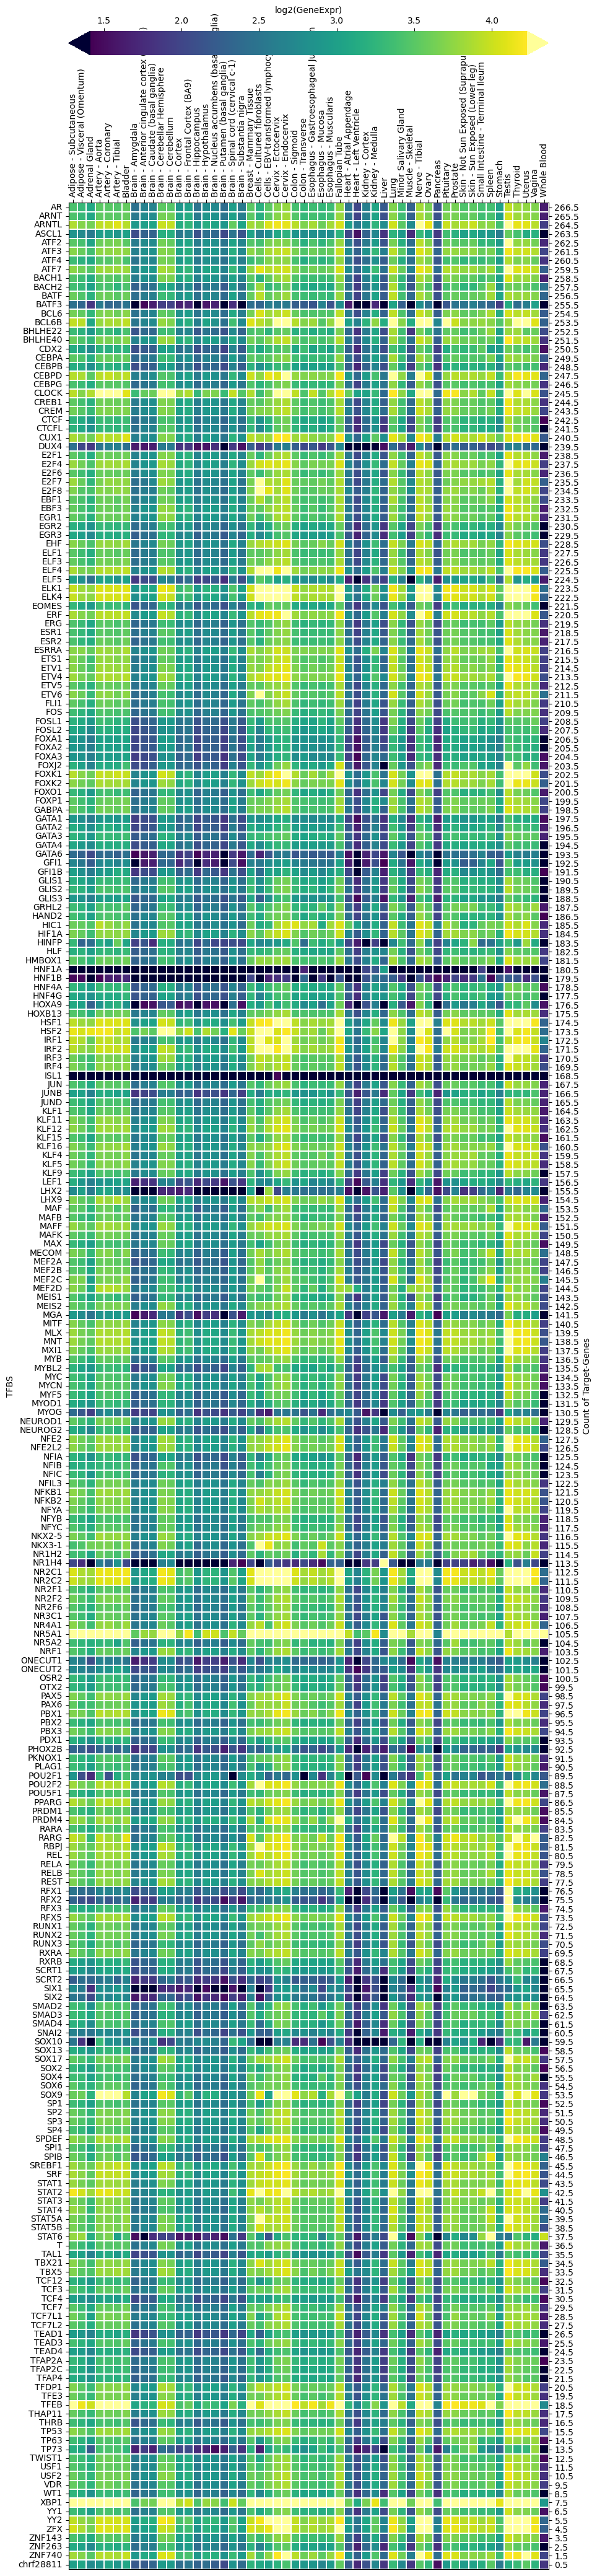

In [209]:
value_max = max(mean_log2_expr_per_tissue.max())
value_min = min(mean_log2_expr_per_tissue.min())

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")

fig, ax = plt.subplots(figsize=(10, 62))
heatmap = sns.heatmap(mean_log2_expr_per_tissue,cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"log2(GeneExpr)", "extend":"both"}, robust=True)
#plt.title('Genexpression in different tissues')
plt.xlabel('Tissues')
plt.ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)

ax2 = ax.twinx()
ax2.set_ylabel("Count of Target-Genes")
ax2.set_ylim([0,ax.get_ylim()[0]])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(tf_id_count.values[::-1])

plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend.png")
# fig.savefig("images/log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend_with_traget_gene_count.png")
plt.show()



### Genexpression per Promotor per tissue ?? 

gtex Data csv, --> sort by tissues with max(sum(EXPR))

In [346]:
unique_geneID = df_combined.drop_duplicates("geneID")

In [347]:
unique_geneID_expr = unique_geneID.iloc[:,9:]

In [348]:
unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)

/tmp/ipykernel_1496857/2429896092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)


In [349]:
# Sort by chr
def custom_sort_key(chr_value):
    if chr_value.startswith('chrX'):
        return 1000
    elif chr_value.startswith('chrY'):
        return 1001
    else:
        return int(chr_value[3:])
    
def chr_lst(chr):
    chr_unique = np.array([])
    chr_out = []
    for i in chr:
        if np.isin(i, chr_unique):
            chr_out.append(np.NAN)
        else:
            chr_out.append(i)
            chr_unique = np.append(chr_unique, i)
    return np.array(chr_out)
        

In [364]:
genexpr_sort = unique_geneID.sort_values(by="chr", key=lambda x: x.apply(custom_sort_key))
genexpr_sort_df = genexpr_sort.iloc[:,9:-1]


In [352]:
chr = list(genexpr_sort.chr)
chr_out = chr_lst(chr)
chr_out

array(['chr1', 'nan', 'nan', ..., 'nan', 'nan', 'nan'], dtype='<U32')

In [365]:
#s = genexpr_sort_df.sum()
#genexpr_sort_df = genexpr_sort_df[s.sort_values(ascending=False).index[:]]
log_genexpr_sort_df = np.log2(genexpr_sort_df)[np.log2(genexpr_sort_df) != -np.inf]


/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [366]:
log_genexpr_sort_nona = log_genexpr_sort_df.dropna()

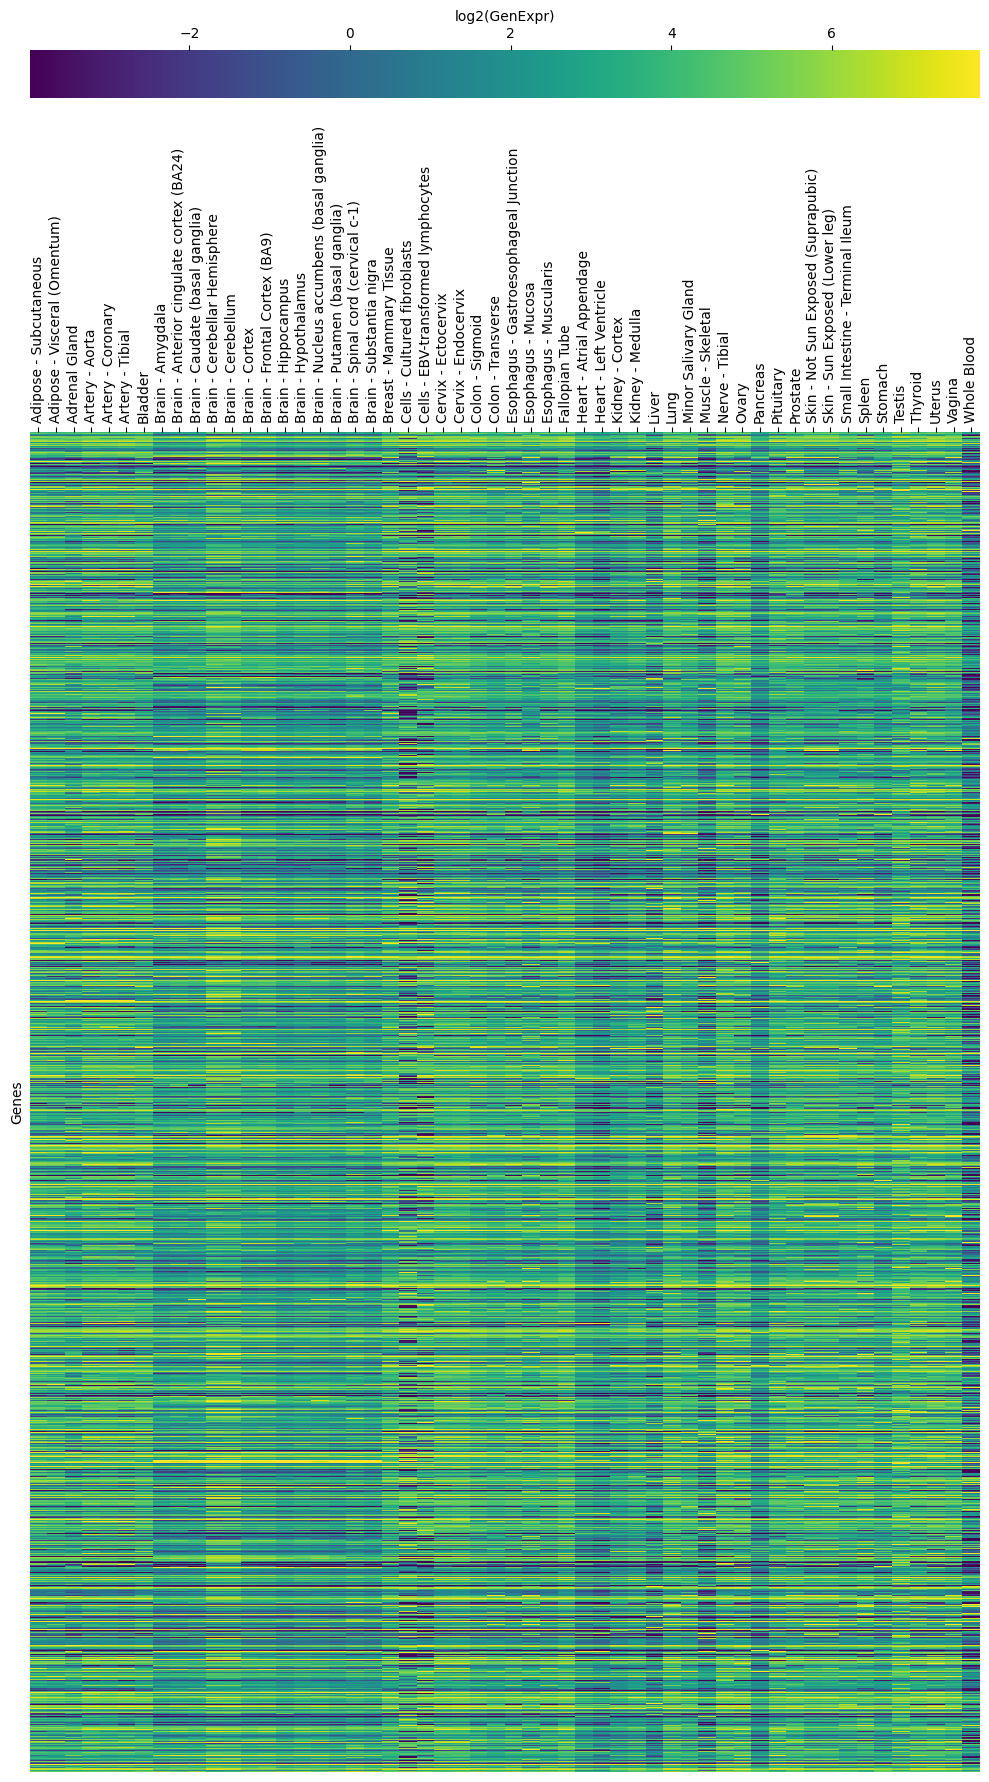

In [368]:
fig, ax = plt.subplots(figsize=(10, 20))
heatmap = sns.heatmap(log_genexpr_sort_nona,cmap="viridis", fmt=".2f", cbar_kws={"orientation": "horizontal", "location":"top","label":"log2(GenExpr)", "pad":0.17}, robust=True, yticklabels="")
#plt.title('Genexpression in different tissues')
#plt.xlabel('TFBS')
ax.set_ylabel('Genes')
#ax.set_yticks("")

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log_GenExr_all_tissues_all_genes_sort_chr_tissue.png")
plt.show()


# Homotypic Pearson Correlation

## Data and Functions

In [148]:
len(df_combined.tf.unique())
len(df_combined_old.tf.unique())

267

In [125]:
def transform_expr_to_log_zero_to_nan(df, expr_iloc_start=9, expr_iloc_end=None):
    if expr_iloc_end is None:
        expr_iloc_end = len(df.columns)
    expr = df.iloc[:,expr_iloc_start:expr_iloc_end]
    replace_zero = expr.replace(0, np.NAN)
    expr_log2 = np.log2(replace_zero)
    df_new = df.copy()
    df_new.iloc[:,expr_iloc_start:expr_iloc_end] = expr_log2
    return df_new

In [126]:
df_log_expr = transform_expr_to_log_zero_to_nan(df_combined)
df_log_expr

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,-0.533242,...,0.164786,-0.048412,0.722466,1.029276,0.977463,1.071763,0.349365,1.387363,12.065248,-1.049905
1,chr1,ENSG00000143569.18,HMBOX1,9,19,T,1,12,11,5.667892,...,5.635609,5.739038,5.148527,5.299391,4.719183,6.031439,5.907852,6.035514,5.787250,4.108524
2,chr10,ENSG00000213390.10,HMBOX1,47,57,nT,1,73,55,2.902460,...,3.282885,3.192825,3.046666,4.332708,2.172488,5.034744,2.763836,3.455492,3.135042,2.953265
3,chr1,ENSG00000169241.17,HMBOX1,160,170,nT,1,115,81,4.980025,...,5.381802,5.335569,5.551208,5.715893,5.047015,4.516015,5.541948,4.922911,5.015248,4.200065
4,chr1,ENSG00000185499.16,HMBOX1,173,183,nT,1,23,20,2.388190,...,2.588565,2.746528,3.217231,1.586885,8.501837,5.176323,4.838952,4.423242,4.512859,-0.736966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700844,chr7,ENSG00000105851.10,STAT5B,-3,8,T,1,33,32,0.263034,...,-1.994241,-1.836501,1.165430,2.533563,-0.800877,2.312084,-0.187707,-0.720232,-1.207561,2.907275
700845,chr7,ENSG00000075790.10,STAT5B,124,135,nT,1,31,26,4.383359,...,3.628190,3.583760,3.162371,3.263185,3.037382,4.919340,5.226123,4.866908,4.450881,1.025029
700846,chr7,ENSG00000128590.4,STAT5B,54,69,T,1,71,59,4.663914,...,4.300490,4.084915,4.377818,4.653060,4.618239,5.744430,5.419539,5.175325,4.564988,3.105678
700847,chr7,ENSG00000198839.9,STAT5B,56,71,nT,1,122,89,3.385431,...,3.350497,3.211635,2.663345,2.647545,2.904966,2.831675,3.306262,3.350497,3.389567,1.624335


In [231]:
# df_log_expr.iloc[:,9].notna()
# pearsonr(df_log_expr.homotypic_count[df_log_expr.iloc[:,9].notna()], df_log_expr.iloc[:,9][df_log_expr.iloc[:,9].notna()])

In [127]:
def get_pearson(df, tissue="GeneExpr"):
    tfs = df["tf"].unique()
    r_lst = []
    p_lst = []
    tf_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) >= 2:
            r, p_value = pearsonr(df_tf["homotypic_count"], np.array(df_tf[tissue]))
            r_lst.append(r)
            p_lst.append(p_value)
            tf_lst.append(tf)
        else:
            print(f"{tf} has less then 2 entrys. No Correlation could be calculated")
    pearson_df = pd.DataFrame({"TFs":tf_lst, "Pearson_r":r_lst, "Pearson_p":p_lst})

    return pearson_df

    

In [128]:
def get_pearson_all_tissues(df):
    tfs = df["tf"].unique()
    tissues = np.array(df.columns[9:])
    
    # initialize Array with shape (0,54), This is important to vstack the 1D-Arrays for every tf, to genereate a 2D-array.
    r_all_tf = np.zeros([0,len(tissues)])
    p_all_tf = np.zeros([0,len(tissues)])

    tfs_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) > 1:
            tfs_lst.append(tf)

            tfbs_counts = np.array(df_tf["homotypic_count"])
            expr = np.array(df_tf.iloc[:,9:])

            r_all_tissue = np.array([])
            p_all_tissue = np.array([])
            for tissue in range(len(tissues)):
                tissue_expr = expr[:,tissue]
                
                # REMOVE NANS for both Arrays
                mask = ~np.isnan(tissue_expr)
                tissue_expr_notNAN = tissue_expr[mask]
                tfbs_counts_notNAN = tfbs_counts[mask]
                

                r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
                r_all_tissue = np.append(r_all_tissue, r)
                p_all_tissue = np.append(p_all_tissue, p)
            # Appand r and p for single tfs into one big 2d array
            r_all_tf = np.vstack((r_all_tf, r_all_tissue))
            p_all_tf = np.vstack((p_all_tf, p_all_tissue))

        else:
            print(f"{tf} has only 1 entry. No Correlation could be calculated")
        # Add columns to DataFrame and set index to tf names
        r_df = pd.DataFrame(r_all_tf, columns=tissues)
        r_df.index = tfs_lst
        p_df = pd.DataFrame(p_all_tf, columns=tissues)
        p_df.index = tfs_lst       
        
    return r_df, p_df

## Pearson Correlation -FLAT

In [129]:
def transform_expr_to_log_zero_to_nan(df, expr_iloc_start=9, expr_iloc_end=None):
    if expr_iloc_end is None:
        expr_iloc_end = len(df.columns)
    expr = df.iloc[:,expr_iloc_start:expr_iloc_end]
    replace_zero = expr.replace(0, np.NAN)
    expr_log2 = np.log2(replace_zero)
    df_new = df.copy()
    df_new.iloc[:,expr_iloc_start:expr_iloc_end] = expr_log2
    return df_new

In [130]:
### Short way to get Pearson Correlation for flat df
def get_pearson_FLAT(df_combined, col1="homotypic_count"):
    df_log_expr = transform_expr_to_log_zero_to_nan(df_combined)
    target_gene_log_flat = flatten_tissues_expand_df(df_log_expr)
    # REMOVE NAN values from Gene Expression
    target_gene_log_flat_noNAN = target_gene_log_flat[target_gene_log_flat["GeneExpr"].notna()]
    # Group Dataframe by TF and calculate Pearson Correlation for col1 und GeneExpr
    r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"])) 
    # Generate a DataFrame to save Result in an better format
    r_p_df_flat_df = pd.DataFrame({"TFs":r_p_grouped_tf.index, "Pearson_r":[r_p_grouped_tf[i][0] for i in range(len(r_p_grouped_tf.index))], "Pearson_p":[r_p_grouped_tf[i][1] for i in range(len(r_p_grouped_tf.index))]})
    return r_p_df_flat_df

In [57]:
r_p_df_flat_df = get_pearson_FLAT(df_combined)

/tmp/ipykernel_11449/2807192257.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"]))
/tmp/ipykernel_11449/2807192257.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r_p_grouped_tf = target_gene_log_flat_noNAN.groupby(["tf"]).apply(lambda x: pearsonr(x[col1], x["GeneExpr"]))
/tmp/ipykernel_11449/2807192257.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

NameError: name 'v' is not defined

In [58]:
r_p_df_flat_df

,TFs,Pearson_r,Pearson_p
0,AR,0.035637,2.621109e-168
1,ARNT,0.056789,9.582940e-168
2,ARNTL,-0.013846,3.158294e-01
3,ASCL1,0.018036,8.326413e-08
4,ATF2,0.108349,7.415536e-108
...,...,...,...
261,YY2,0.032123,3.501069e-09
262,ZFX,0.073437,2.378825e-61
263,ZNF143,0.065234,1.392904e-182
264,ZNF263,NaN,NaN


In [61]:
def remove_NAN_and_p_value_and_sort_abs_r(r_p_df_flat_df, p_value=0.05):
    r_p_df = r_p_df_flat_df.dropna()
    p_filter = r_p_df[r_p_df["Pearson_p"] < p_value]
    r_sort = p_filter.sort_values(by="Pearson_r", key=lambda x:np.abs(x), ascending=False)
    
    #Transform p_values
    df = r_sort.copy()
    # df["Pearson_p"] = np.log10(r_sort["Pearson_p"])
    return r_p_df,p_filter, df
    

In [62]:
r_p_df, p_filter,  pearson_df_sort_pval = remove_NAN_and_p_value_and_sort_abs_r(r_p_df_flat_df)
# np.array(r_p_df[r_p_df["Pearson_p"]>0.01].TFs)
pearson_df_sort_pval

,TFs,Pearson_r,Pearson_p
98,ISL1,-0.353881,6.695691e-49
153,NR1H4,-0.329002,4.487849e-45
253,TP73,0.221818,1.884260e-48
86,HNF1A,-0.161117,5.686210e-60
174,PHOX2B,-0.145266,9.007330e-56
...,...,...,...
146,NFKB2,-0.009683,1.525588e-04
145,NFKB1,0.008570,6.439262e-04
245,TFAP4,-0.007738,5.018001e-05
232,TBX21,0.007275,1.257836e-02


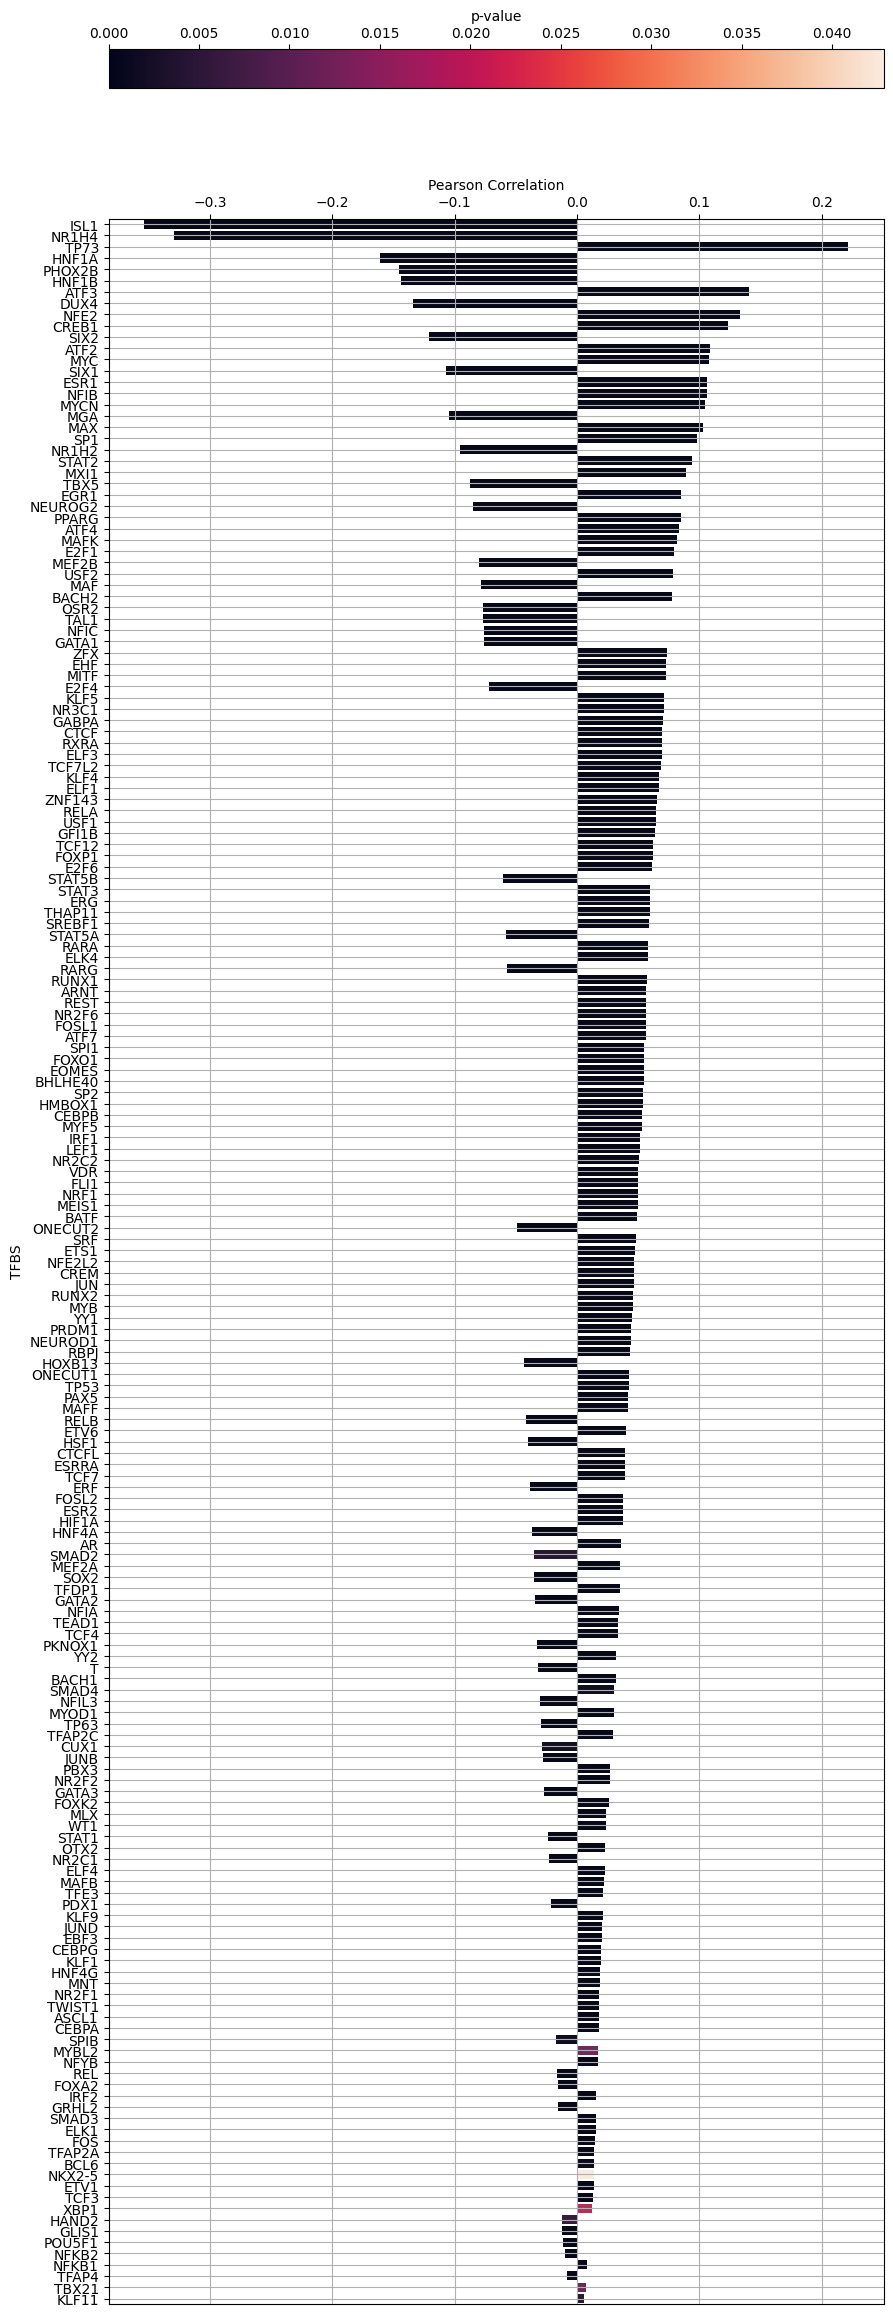

In [63]:
fig, ax = plt.subplots(figsize=(10,33))

norm = plt.Normalize(pearson_df_sort_pval["Pearson_p"].min(), pearson_df_sort_pval["Pearson_p"].max())
sm = plt.cm.ScalarMappable(cmap="rocket", norm=norm)


sns.barplot(pearson_df_sort_pval, x="Pearson_r", y="TFs",hue="Pearson_p", palette="rocket",dodge=False)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Pearson Correlation')
ax.xaxis.set_label_position("top")


ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.get_legend().remove()

plt.subplots_adjust(top=0.9)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top", )
cbar.set_label("p-value")

# fig.savefig("images/homotypic_FLAT_Pearson_Bar.png")

### Filter Data for specific TFs and plot

In [64]:
r_p_df_flat_df_new = r_p_df_flat_df.set_index("TFs")
r_p_df_flat_df_new

,Pearson_r,Pearson_p
TFs,,
AR,0.035637,2.621109e-168
ARNT,0.056789,9.582940e-168
ARNTL,-0.013846,3.158294e-01
ASCL1,0.018036,8.326413e-08
ATF2,0.108349,7.415536e-108
...,...,...
YY2,0.032123,3.501069e-09
ZFX,0.073437,2.378825e-61
ZNF143,0.065234,1.392904e-182


In [65]:
## Specific TFs
tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "SOX10", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]

In [109]:
# Filter
pearson_most_target_df = r_p_df_flat_df_new.loc[tf_most_target_genes]
pearson_big_and_small_expr = r_p_df_flat_df_new.loc[tf_biggest_expr+tf_smallest_expr]

# pearson_big_and_small_expr[pearson_big_and_small_expr["Pearson_p"] > 0.05] = np.NaN

print(pearson_most_target_df)
print(pearson_big_and_small_expr)

        Pearson_r      Pearson_p
TFs                             
MYC      0.108204   0.000000e+00
ESR1     0.106630   0.000000e+00
SP1      0.097680   0.000000e+00
CTCF     0.069523   0.000000e+00
E2F1     0.079689   0.000000e+00
MAX      0.103280   0.000000e+00
RUNX1    0.057248   0.000000e+00
TFAP2C   0.029073  7.115132e-169
AR       0.035637  2.621109e-168
KLF5     0.070857   0.000000e+00
JUN      0.046271   0.000000e+00
RELA     0.064939   0.000000e+00
MYCN     0.104912   0.000000e+00
CREB1    0.123672   0.000000e+00
E2F6     0.061592   0.000000e+00
SP2      0.054196  7.459546e-268
       Pearson_r     Pearson_p
TFs                           
NR5A1        NaN           NaN
XBP1    0.012504  2.121877e-02
TFEB    0.007523  2.838254e-01
HSF2         NaN           NaN
NR2C1  -0.022881  9.969901e-06
NR1H4  -0.329002  4.487849e-45
SOX10        NaN           NaN
HNF1B  -0.143396  3.792402e-46
HNF1A  -0.161117  5.686210e-60
ISL1   -0.353881  6.695691e-49


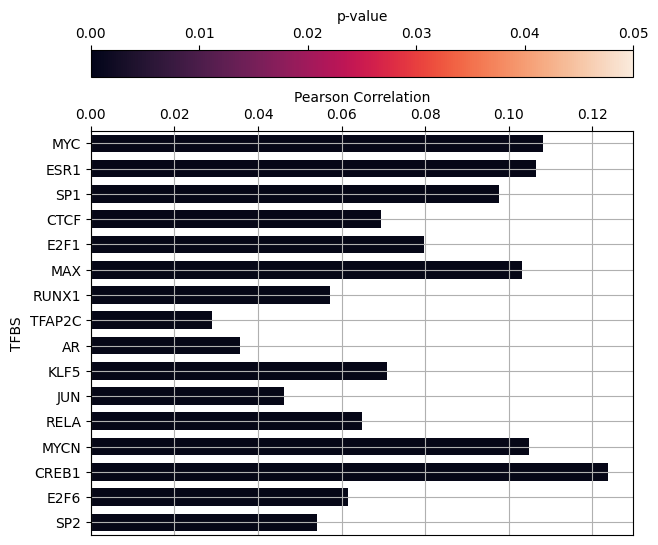

In [120]:
fig, ax = plt.subplots(figsize=(7,7))

norm = plt.Normalize(0,0.05)
sm = plt.cm.ScalarMappable(cmap="rocket", norm=norm)


sns.barplot(pearson_most_target_df, x="Pearson_r", y=pearson_most_target_df.index,hue="Pearson_p", palette="rocket",dodge=False, width=.7, hue_norm=norm)


ax.set_ylabel('TFBS')

ax.xaxis.tick_top()
ax.set_xlabel('Pearson Correlation')
ax.xaxis.set_label_position("top")


ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.get_legend().remove()

# plt.subplots_adjust(top=0.9)
cbar = ax.figure.colorbar(sm, ax=ax, orientation= "horizontal", location="top", pad=.1)
cbar.set_label("p-value")

# fig.savefig("images/homotypic_FLAT_Pearson_Bar_most_target.png")

## Pearson Correlation -ALL

In [131]:
r_df, p_df = get_pearson_all_tissues(df_log_expr)

/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: Consta

NR5A1 has only 1 entry. No Correlation could be calculated


/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)
/tmp/ipykernel_11449/4287988030.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(tfbs_counts_notNAN, tissue_expr_notNAN)


In [132]:
r_df

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
HMBOX1,0.050667,0.047700,0.054120,0.055090,0.054105,0.053743,0.056381,0.057794,0.063719,0.060736,...,0.064078,0.061939,0.050218,0.046931,0.060754,0.071217,0.067283,0.056651,0.057334,0.057426
PKNOX1,-0.047389,-0.056547,-0.032954,-0.042267,-0.044801,-0.038387,-0.042006,-0.010465,-0.003570,0.003132,...,-0.029767,-0.030391,-0.046038,-0.055608,-0.046838,-0.019260,-0.036284,-0.035734,-0.038433,-0.062199
NR2C2,0.050271,0.044005,0.049566,0.057841,0.055751,0.061289,0.063838,0.040826,0.046499,0.047430,...,0.048199,0.048736,0.054916,0.042782,0.055664,0.099886,0.058369,0.062382,0.053157,0.007993
CLOCK,0.025361,0.015014,0.000034,0.022819,0.007864,0.036301,0.031926,0.017861,0.025380,0.006495,...,0.034840,0.015742,0.016779,-0.016052,0.003328,-0.084774,0.076303,0.059403,0.010774,-0.079954
TP63,-0.020652,-0.031362,-0.040114,-0.018824,-0.023537,-0.029879,-0.016541,-0.052116,-0.047310,-0.060409,...,0.046064,0.045625,-0.017188,-0.032401,-0.045056,-0.048752,-0.029107,-0.031397,0.036612,-0.060500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RXRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KLF9,0.026095,0.024957,0.021006,0.016857,0.016547,0.022077,0.022031,0.016526,0.020591,0.009205,...,0.048817,0.051744,0.022368,0.013513,0.032823,0.028148,0.024621,0.023465,0.029321,0.008924
BATF,0.035215,0.034304,0.037182,0.063506,0.041275,0.035081,0.046258,0.119204,0.098877,0.124122,...,0.007920,0.010557,0.031626,0.032311,0.045604,0.010662,0.048310,0.017440,-0.000298,0.030604
PLAG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Which TFBS have only one TFBS per Promotor?
na_r = pearson_df.Pearson_r.isna().to_numpy()
#pearson_df[na_r].TFs.to_numpy()
pearson_df_sort = pearson_df.reindex(pearson_df["Pearson_r"].abs().sort_values(ascending=False).index).dropna()
pearson_df_sort_pval = pearson_df_sort[pearson_df_sort["Pearson_p"] < 0.05]
pearson_df_sort_pval["Pearson_p"] = -np.log10(pearson_df_sort)

SyntaxError: unexpected EOF while parsing (3277195463.py, line 6)

In [140]:
# Which TFBS have only one TFBS per Promotor?
np.array(sorted(r_df[np.all(r_df.isna(), axis=1)].index.to_numpy()))

array(['BATF3', 'BCL6B', 'CEBPD', 'E2F7', 'E2F8', 'EGR3', 'ELF5', 'ETV5',
       'FOXA3', 'FOXJ2', 'FOXK1', 'GFI1', 'GLIS2', 'GLIS3', 'HIC1',
       'HINFP', 'HOXA9', 'HSF2', 'KLF12', 'KLF15', 'KLF16', 'LHX2',
       'MECOM', 'MEF2C', 'MEF2D', 'MEIS2', 'NFYC', 'NKX3-1', 'NR4A1',
       'NR5A2', 'PAX6', 'PBX1', 'PLAG1', 'POU2F1', 'PRDM4', 'RFX2',
       'RFX3', 'RUNX3', 'RXRB', 'SCRT1', 'SCRT2', 'SOX10', 'SOX4', 'SOX6',
       'SOX9', 'SP3', 'SP4', 'SPDEF', 'STAT4', 'STAT6', 'TCF7L1', 'TEAD3',
       'THRB', 'ZNF263', 'ZNF740'], dtype='<U6')

In [149]:
# Sort both DataFrames based on the sum of the correlation coefficient and remove NANs.
r_df_s = r_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()
p_df_s = p_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()

In [155]:
r_df_filtered_by_p_value = r_df_s[p_df_s<0.05]
r_df_filtered_by_p_value[np.all(r_df_filtered_by_p_value.isna(), axis=1)].index

Index(['STAT2', 'GFI1B', 'HMBOX1', 'LEF1', 'MEIS1', 'ONECUT2', 'ONECUT1',
       'ESRRA', 'TCF7', 'TEAD1', 'YY2', 'SMAD4', 'CUX1', 'NR2C1', 'ELF4',
       'MAFB', 'PDX1', 'EBF3', 'CEBPG', 'TWIST1', 'LHX9', 'NKX2-5', 'ARNTL',
       'BCL6', 'XBP1', 'CLOCK', 'POU5F1', 'RFX1', 'TFEB', 'SOX17', 'KLF11',
       'EGR2', 'GATA4', 'SOX13', 'MYOG', 'TEAD4', 'HLF', 'PBX2', 'ETV4',
       'POU2F2', 'RFX5', 'NFYA'],
      dtype='object')

In [156]:
r_df_filtered_by_p_value_remove_nan_rows = r_df_filtered_by_p_value[~np.all(r_df_filtered_by_p_value.isna(), axis=1)]
r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean = r_df_filtered_by_p_value_remove_nan_rows.reindex(abs(r_df_filtered_by_p_value_remove_nan_rows.mean(axis=1, skipna=True)).sort_values(ascending=False).index)

#### Plot

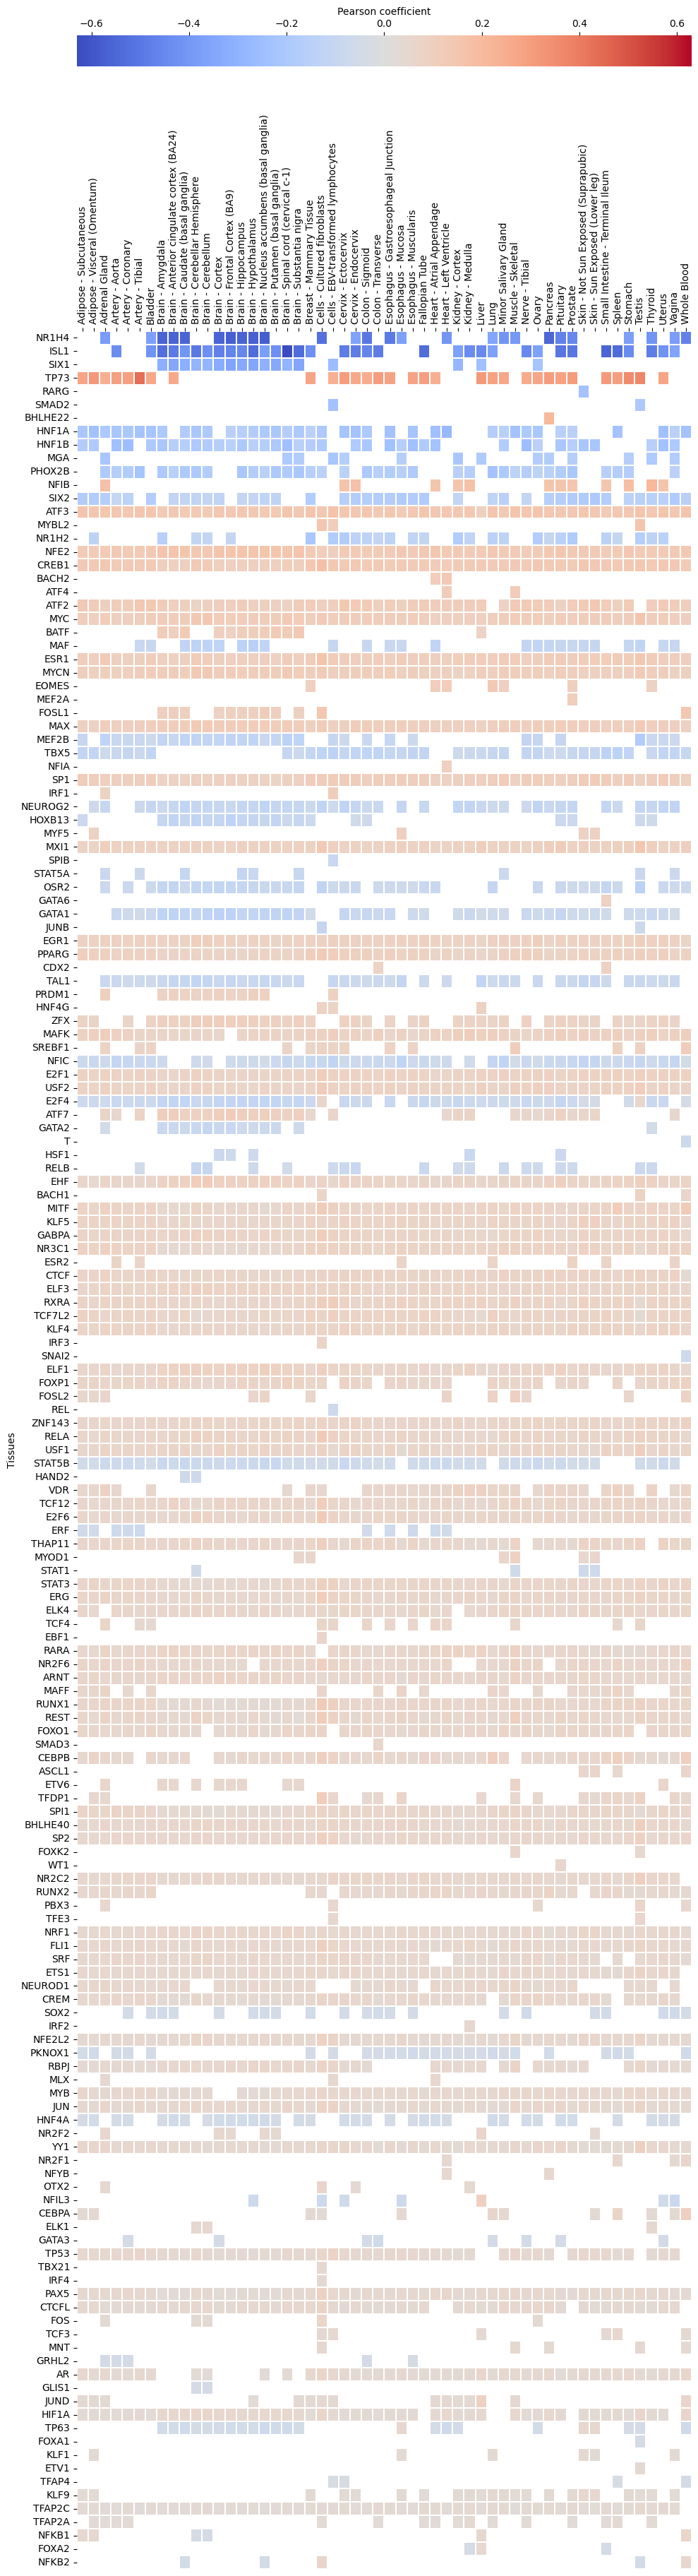

In [280]:
value_max = max(max(abs(r_df_filtered_by_p_value.max())), max(abs(r_df_filtered_by_p_value.min())))
value_min = -value_max


fig, ax = plt.subplots(figsize=(10,42))
heatmap = sns.heatmap(r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean, cmap='coolwarm', fmt=".2f", linewidths=0.01,vmin=value_min, vmax=value_max, cbar_kws={"orientation": "horizontal", "location":"top", "label":"Pearson coefficient", "pad":0.09})
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
fig.savefig("images/Pearson_filtered_remove_p_sort_by_mean_withoutNAN.png")
plt.show()

#### Filter Data for specific TFBS and plot 

In [158]:
r_df_filtered_by_p_value

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
ISL1,NaN,NaN,NaN,-0.434683,NaN,NaN,-0.415590,-0.529215,-0.495137,-0.410246,...,NaN,NaN,-0.559795,-0.537691,-0.442789,NaN,-0.486210,-0.418859,-0.358621,NaN
NR1H4,NaN,NaN,-0.386689,NaN,NaN,NaN,-0.371597,-0.564138,-0.563728,-0.558757,...,NaN,NaN,NaN,NaN,-0.374199,NaN,-0.411642,NaN,-0.379607,-0.470304
TP73,0.272332,0.319561,0.244256,0.293818,0.294898,0.432998,0.266083,NaN,0.265100,NaN,...,NaN,NaN,0.311814,0.297161,0.354568,0.372181,NaN,0.276933,NaN,NaN
HNF1A,-0.211272,-0.239639,-0.201701,-0.212059,-0.205639,-0.228990,-0.219887,-0.200042,NaN,-0.184365,...,NaN,NaN,NaN,-0.226388,NaN,NaN,NaN,-0.245212,-0.152769,-0.234753
PHOX2B,NaN,NaN,-0.190796,-0.165893,-0.172292,-0.222898,NaN,-0.199947,-0.156189,-0.196013,...,NaN,NaN,-0.159374,-0.171861,-0.170477,NaN,NaN,NaN,-0.144281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETV4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POU2F2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFX5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Specific TFs
tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "SOX10", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]